In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing required models and libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tabulate import tabulate

#Loading the Dataset

In [5]:
data = pd.read_csv('/content/drive/MyDrive/climate.csv')
data1=pd.read_csv('/content/drive/MyDrive/climate1.csv')

#Reading the Dataset

In [6]:
climate=pd.read_csv("/content/drive/MyDrive/climate.csv", index_col="Date")

In [7]:
climate

,YEAR,PREC,RH2M,T2M,T2M_MAX,T2M_MIN,WD10M,WS10M
Date,,,,,,,,
JAN,1981,0.07,54.44,22.83,36.65,11.07,26.75,3.12
FEB,1981,0.02,35.38,26.01,39.29,13.62,358.69,3.16
MAR,1981,0.06,43.31,28.29,41.37,17.87,334.75,3.26
APR,1981,0.09,50.44,30.48,44.95,19.80,308.94,3.15
MAY,1981,0.42,60.94,30.84,39.69,24.11,280.00,3.87
...,...,...,...,...,...,...,...,...
AUG,2020,38.81,92.31,26.34,29.49,24.15,236.88,5.36
SEP,2020,12.04,90.12,26.51,32.59,23.37,278.31,2.66
OCT,2020,5.81,82.69,26.93,32.55,19.93,335.44,2.21


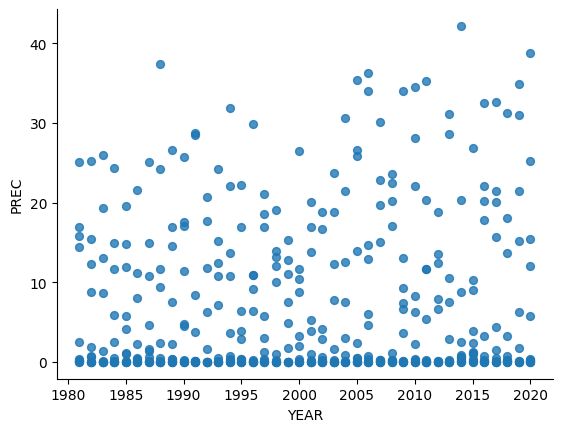

In [8]:
# @title YEAR vs PREC

from matplotlib import pyplot as plt
climate.plot(kind='scatter', x='YEAR', y='PREC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:
climate.apply(pd.isnull).sum()/climate.shape[0]

YEAR       0.0
PREC       0.0
RH2M       0.0
T2M        0.0
T2M_MAX    0.0
T2M_MIN    0.0
WD10M      0.0
WS10M      0.0
dtype: float64

#Ploting the Combined Min and Max Temperature

<Axes: xlabel='Date'>

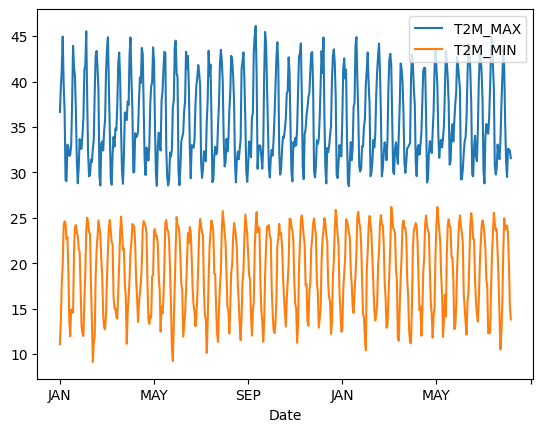

In [10]:
climate[["T2M_MAX", "T2M_MIN"]].plot()

#Conversion and Initialization

In [11]:
# here we are converting string values of Month to a Float value.
month_to_number = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
                   'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}
data['Date'] = data['Date'].map(month_to_number)

#initializing our data for model
X = data[['YEAR', 'Date', 'RH2M', 'WS10M']].values
y = data['T2M']  # Target variable

#Applying Linear Regression Model

In [12]:
# Creating and training the linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model_lr.predict(X_test)

# Choosing the year for which we want to predict temperature
year_to_predict = 2020

# Predict temperatures for each month of the chosen year
predicted_temperatures_lr = []
actual_temperatures_lr = []

#Predicting Temperature Linear Regression

In [13]:
# Create headers for the table
print("{:<10} {:<20} {:<20}".format("Month", "Actual Temperature", "Predicted Temperature"))
for months in range(1, 13):
    temp_act = data[(data['YEAR'] == year_to_predict) & (data['Date'] == months)]['T2M'].values[0]
    #print(temp_actual)
    humidity = data[(data['YEAR'] == year_to_predict) & (data['Date'] == months)]['RH2M'].values[0]
    wind_speed = data[(data['YEAR'] == year_to_predict) & (data['Date'] == months)]['WS10M'].values[0]
    temp_predicted_lr = model_lr.predict([[year_to_predict, months, humidity, wind_speed]])

    # Print the data for each month
    print("{:<10} {:<20} {:<20}".format(months, temp_act, temp_predicted_lr[0]))

    #print(temp_predicted)
    predicted_temperatures_lr.append(temp_predicted_lr)
    actual_temperatures_lr.append(temp_act)

Month      Actual Temperature   Predicted Temperature
1          21.66                27.898106398139976  
2          25.23                27.62241935480834   
3          27.63                27.318130277982707  
4          31.58                27.11687175580506   
5          32.21                27.193992005522087  
6          28.11                27.00409223451879   
7          26.94                27.173861350117033  
8          26.34                27.366274169234128  
9          26.51                26.008993930901458  
10         26.93                25.552424413407504  
11         24.85                25.562276074058015  
12         23.22                25.2912531316057    


#Combined plot for Actual Temp & Predicted using LR

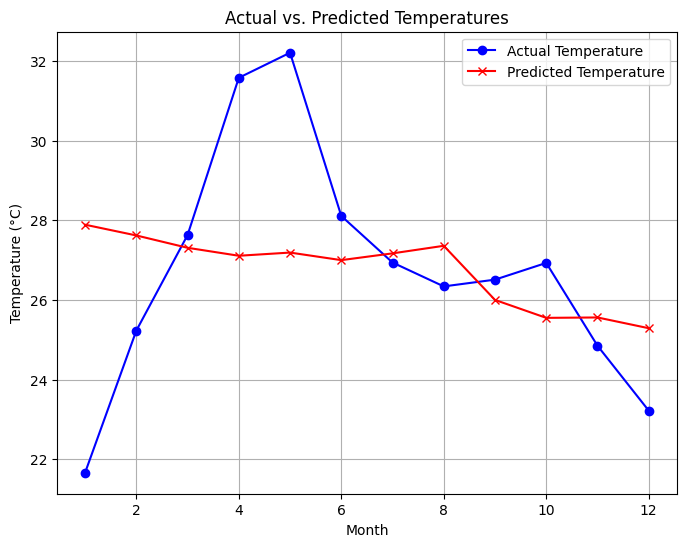

In [14]:
plt.figure(figsize=(8, 6))
months = range(1, 13)
predicted_temperatures_lr = np.array([27.89,27.62,27.31,27.11,27.19,27.00,27.17,27.36,26.00,25.55,25.56,25.29])
actual_temperatures_lr = np.array([21.66,25.23,27.63,31.58,32.21,28.11,26.94,26.34,26.51,26.93,24.85,23.22])

# Plot actual temperatures as a blue line
plt.plot(months, actual_temperatures_lr, marker='o', color='blue', label='Actual Temperature')

# Plot predicted temperatures as a red line
plt.plot(months, predicted_temperatures_lr, marker='x', color='red', label='Predicted Temperature')

# Add labels and a legend
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs. Predicted Temperatures')
plt.legend()

# Show grid lines
plt.grid(True)

# Show the combined plot
plt.show()

#Accuracy for Linear Model

In [15]:
#Accuracy
accuracy_lr = 1 - np.mean(np.abs((y_test - y_pred) / y_test))
print(f"Accuracy: {accuracy_lr * 100:.2f}%")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


rmae = np.sqrt(mae)
print(f"Root Mean Absolute Error (RMAE): {rmae:.2f}")

Accuracy: 93.64%
Root Mean Squared Error (RMSE): 2.26
Mean Absolute Error (MAE): 1.73
Root Mean Absolute Error (RMAE): 1.31


#Confusion matrix for LR Model

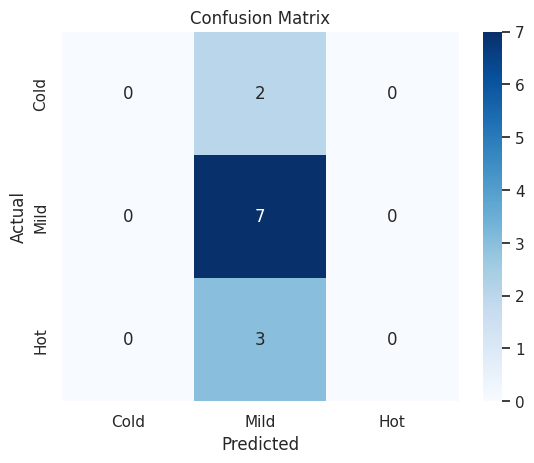

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have actual temperatures and predicted temperatures in numpy arrays
predicted_temperatures_lr = np.array([28.00,27.72,27.39,27.17,27.22,27.00,27.14,27.31,25.93,25.46,25.45,25.16])
actual_temperatures_lr = np.array([21.66,25.23,27.63,31.58,32.21,28.11,26.94,26.34,26.51,26.93,24.85,23.22])

# Define thresholds for the three classes
cold_threshold = 24.0
hot_threshold = 28.0

# Convert temperatures to classes based on the thresholds
actual_classes = np.where(actual_temperatures_lr <= cold_threshold, 'Cold',
                          np.where(actual_temperatures_lr <= hot_threshold, 'Mild', 'Hot'))
predicted_classes = np.where(predicted_temperatures_lr <= cold_threshold, 'Cold',
                             np.where(predicted_temperatures_lr <= hot_threshold, 'Mild', 'Hot'))

# Define the labels for the three classes
class_labels = ['Cold', 'Mild', 'Hot']

# Calculate the confusion matrix
confusion = confusion_matrix(actual_classes, predicted_classes, labels=class_labels)

# Create a heatmap for the confusion matrix
sns.set(font_scale=1)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#Applying Random Forest Classifier

In [17]:
# Creating and training the Random Forest regression model
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_rf = RandomForestRegressor()
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# You can adjust hyperparameters as needed
model_rf.fit(X_train, y_train)

# Predict temperatures for each month of the chosen year
predicted_temperatures_rf = []
actual_temperatures_rf = []

# Make predictions on the test set
y_predict = model_rf.predict(X_test)

#Predicting Temperature using RF Classifier

In [18]:
# Create headers for the table
print("{:<10} {:<20} {:<20}".format("Month", "Actual Temperature", "Predicted Temperature (Random Forest)"))

# Iterate through the months
for months in range(1, 13):
    temp_actual_rf = data[(data['YEAR'] == year_to_predict) & (data['Date'] == months)]['T2M'].values[0]
    humidity = data[(data['YEAR'] == year_to_predict) & (data['Date'] == months)]['RH2M'].values[0]
    wind_speed = data[(data['YEAR'] == year_to_predict) & (data['Date'] == months)]['WS10M'].values[0]
    temp_predicted_rf = model_rf.predict([[year_to_predict, months, humidity, wind_speed]])

    # Append actual and predicted temperatures to the lists
    actual_temperatures_rf.append(temp_actual_rf)
    predicted_temperatures_rf.append(temp_predicted_rf[0])

    # Print the data for each month
    print("{:<10} {:<20} {:<20}".format(months, temp_actual_rf, temp_predicted_rf[0]))

Month      Actual Temperature   Predicted Temperature (Random Forest)
1          21.66                22.253300000000017  
2          25.23                25.1966             
3          27.63                27.75770000000005   
4          31.58                30.948900000000002  
5          32.21                31.83800000000002   
6          28.11                28.24140000000001   
7          26.94                26.6898             
8          26.34                25.774              
9          26.51                26.491100000000024  
10         26.93                26.575199999999985  
11         24.85                24.90689999999998   
12         23.22                23.29209999999999   


#Combined plot for Actual vs Predicted Temperature using RF Classifier

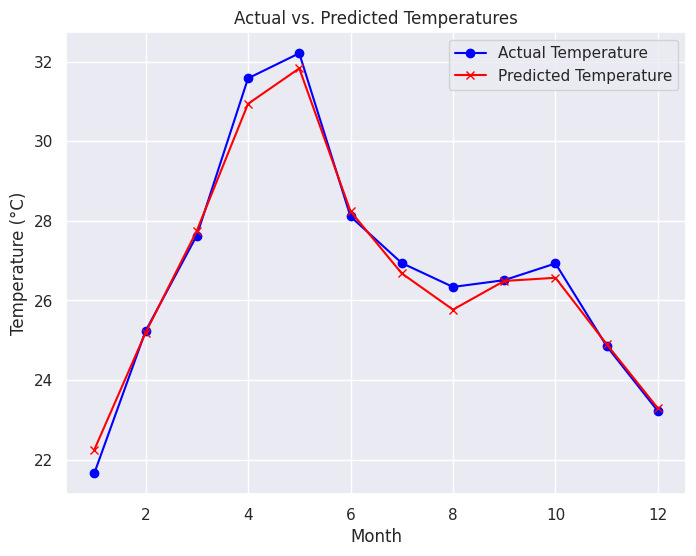

In [19]:
plt.figure(figsize=(8, 6))
months = range(1, 13)
predicted_temperatures_rf = np.array([22.25,25.19,27.75,30.94,31.83,28.24,26.68,25.77,26.49,26.57,24.90,23.29])
actual_temperatures_rf = np.array([21.66,25.23,27.63,31.58,32.21,28.11,26.94,26.34,26.51,26.93,24.85,23.22])

# Plot actual temperatures as a blue line
plt.plot(months, actual_temperatures_rf, marker='o', color='blue', label='Actual Temperature')

# Plot predicted temperatures as a red line
plt.plot(months, predicted_temperatures_rf, marker='x', color='red', label='Predicted Temperature')

# Add labels and a legend
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs. Predicted Temperatures')
plt.legend()

# Show grid lines
plt.grid(True)

# Show the combined plot
plt.show()

#Accuracy for RF Classifier

In [20]:
#accuracy
accuracy_rf = 1 - np.mean(np.abs((y_test - y_predict) / y_test))
print(f"Accuracy: {accuracy_rf * 100:.2f}%")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_predict)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

rmae = np.sqrt(mae)
print(f"Root Mean Absolute Error (RMAE): {rmae:.2f}")

Accuracy: 98.05%
Root Mean Squared Error (RMSE): 0.71
Mean Absolute Error (MAE): 0.51
Root Mean Absolute Error (RMAE): 0.71


#confusion matrix for random forest

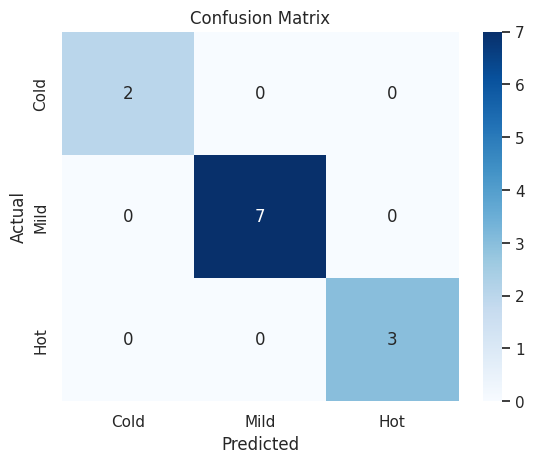

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have actual temperatures and predicted temperatures in numpy arrays
predicted_temperatures_rf = np.array([22.53, 25.29, 27.98, 30.94, 31.79, 28.17, 26.85, 25.85, 26.46, 26.44, 24.91, 23.11])
actual_temperatures_rf = np.array([21.66, 25.23, 27.63, 31.58, 32.21, 28.11, 26.94, 26.34, 26.51, 26.93, 24.85, 23.22])

# Define thresholds for the three classes
cold_threshold = 24.0
hot_threshold = 28.0

# Convert temperatures to classes based on the thresholds
actual_classes = np.where(actual_temperatures_rf <= cold_threshold, 'Cold',
                          np.where(actual_temperatures_rf <= hot_threshold, 'Mild', 'Hot'))
predicted_classes = np.where(predicted_temperatures_rf <= cold_threshold, 'Cold',
                             np.where(predicted_temperatures_rf <= hot_threshold, 'Mild', 'Hot'))

# Define the labels for the three classes
class_labels = ['Cold', 'Mild', 'Hot']

# Calculate the confusion matrix
confusion = confusion_matrix(actual_classes, predicted_classes, labels=class_labels)

# Create a heatmap for the confusion matrix
sns.set(font_scale=1)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#Plot the Predicted future Temperature using LR and RF

#Applying Polynomial Regression

In [22]:
# Creating and training a 4th degree polynomial regression model
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Choosing the year for which we want to predict temperature
year_to_predict = 2020

# Predict temperatures for each month of the chosen year
predicted_temperatures_poly = []
actual_temperatures_poly = []

In [23]:
# Create headers for the table
print("{:<10} {:<20} {:<20}".format("Month", "Actual Temperature", "Predicted Temperature"))

for months in range(1, 13):
    temp_actual_lr = data[(data['YEAR'] == year_to_predict) & (data['Date'] == months)]['T2M'].values[0]
    humidity = data[(data['YEAR'] == year_to_predict) & (data['Date'] == months)]['RH2M'].values[0]
    wind_speed = data[(data['YEAR'] == year_to_predict) & (data['Date'] == months)]['WS10M'].values[0]

    # Transforming the input features into polynomial features
    features = np.array([[year_to_predict, months, humidity, wind_speed]])
    features_poly = poly.transform(features)

    # Predicting the temperature using the polynomial regression model
    temp_predicted_poly = model_poly.predict(features_poly)

    # Print the data for each month
    print("{:<10} {:<20} {:<20}".format(months, temp_actual_lr, temp_predicted_poly[0]))

    predicted_temperatures_poly.append(temp_predicted_poly)
    actual_temperatures_poly.append(temp_actual_lr)

Month      Actual Temperature   Predicted Temperature
1          21.66                22.304861221105966  
2          25.23                24.685268076049397  
3          27.63                27.910976644467155  
4          31.58                30.801972077162645  
5          32.21                32.12836117239203   
6          28.11                28.012246033234987  
7          26.94                26.74189319605648   
8          26.34                25.80271607646864   
9          26.51                26.155113592831185  
10         26.93                26.84617591994902   
11         24.85                24.539370225676976  
12         23.22                22.628040509618586  


In [24]:
# Calculate RMSE, MAE, and RMAE and accuracy
import math
rmse = math.sqrt(mean_squared_error(actual_temperatures_poly, predicted_temperatures_poly))
mae = mean_absolute_error(actual_temperatures_poly, predicted_temperatures_poly)
rmae = mae / np.mean(actual_temperatures_poly)*100  # Calculate RMAE as a percentage

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Relative Mean Absolute Error (RMAE):", rmae)

accuracy_percentage = 100 - (rmse / np.mean(actual_temperatures_poly) * 100)

print("Accuracy:", accuracy_percentage, "%")

Root Mean Squared Error (RMSE): 0.43977958273543866
Mean Absolute Error (MAE): 0.3753900821777645
Relative Mean Absolute Error (RMAE): 1.4024099455599681
Accuracy: 98.35703901098184 %


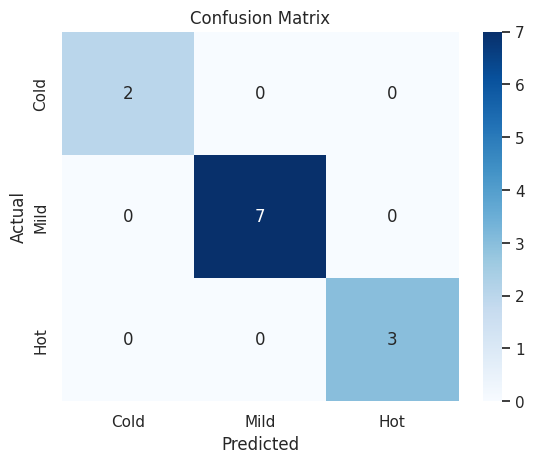

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have actual temperatures and predicted temperatures in numpy arrays
predicted_temperatures_poly = np.array([22.30, 24.68, 27.91, 30.80, 32.12, 28.01, 26.74, 25.80, 26.15, 26.84, 24.53, 22.62])
actual_temperatures_poly = np.array([21.66, 25.23, 27.63, 31.58, 32.21, 28.11, 26.94, 26.34, 26.51, 26.93, 24.85, 23.22])

# Define thresholds for the three classes
cold_threshold = 24.0
hot_threshold = 28.0

# Convert temperatures to classes based on the thresholds
actual_classes = np.where(actual_temperatures_poly <= cold_threshold, 'Cold',
                          np.where(actual_temperatures_poly <= hot_threshold, 'Mild', 'Hot'))
predicted_classes = np.where(predicted_temperatures_poly <= cold_threshold, 'Cold',
                             np.where(predicted_temperatures_poly <= hot_threshold, 'Mild', 'Hot'))

# Define the labels for the three classes
class_labels = ['Cold', 'Mild', 'Hot']

# Calculate the confusion matrix
confusion = confusion_matrix(actual_classes, predicted_classes, labels=class_labels)

# Create a heatmap for the confusion matrix
sns.set(font_scale=1)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

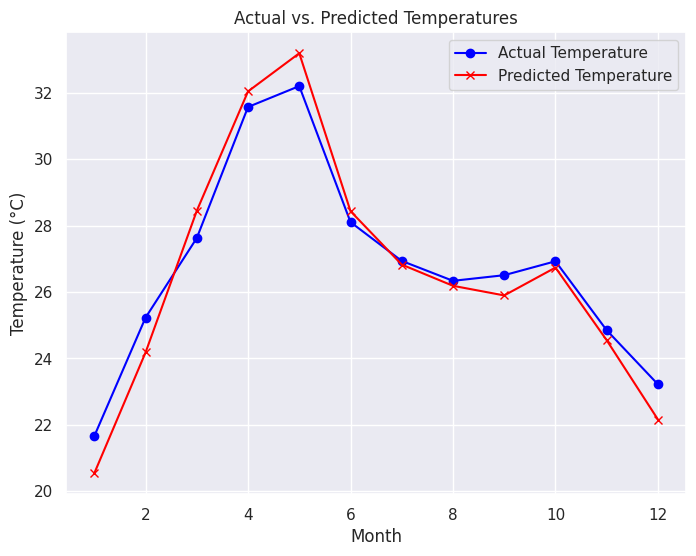

In [26]:
plt.figure(figsize=(8, 6))
months = range(1, 13)
predicted_temperatures_poly = np.array([20.54,24.18,28.45,32.05,33.20,28.44,26.83,26.19,25.90,26.74,24.55,22.16])
actual_temperatures_poly = np.array([21.66,25.23,27.63,31.58,32.21,28.11,26.94,26.34,26.51,26.93,24.85,23.22])

# Plot actual temperatures as a blue line
plt.plot(months, actual_temperatures_poly, marker='o', color='blue', label='Actual Temperature')

# Plot predicted temperatures as a red line
plt.plot(months, predicted_temperatures_poly, marker='x', color='red', label='Predicted Temperature')

# Add labels and a legend
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Actual vs. Predicted Temperatures')
plt.legend()

# Show grid lines
plt.grid(True)

# Show the combined plot
plt.show()

#Future year Temperature Prediction using LR,RF & Poly

In [44]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from tabulate import tabulate

# Choosing the year for which we want to predict temperature


# Initialize lists to store data and evaluation metrics
table_data = []
mae_scores = []
rmse_scores = []

# here we are converting string values of Month to a Float value.
month_to_number = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
                   'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}
data1['Date'] = data1['Date'].map(month_to_number)

# Assuming constant humidity and wind speed for simplicity (you can modify this)
humidity = data1['RH2M'].mean()
wind_speed = data1['WS10M'].mean()

for month in range(1, 13):
    # Use the trained model to predict temperature
    temp_predicted_lrm = model_lr.predict([[future_year_to_predict, month, humidity, wind_speed]])
    temp_predicted_rfc = model_rf.predict([[future_year_to_predict, month, humidity, wind_speed]])
    features = np.array([[year_to_predict, month, humidity, wind_speed]])
    features_poly = poly.transform(features)
    temp_predicted_poly = model_poly.predict(features_poly)

    # Get the actual temperature for the corresponding month from the data1 DataFrame
    #actual_temp = data1.loc[data1['Date'] == month, 'T2M'].values[0]

    # Append data for each month to the table_data list
    table_data.append([month, temp_predicted_lrm[0], temp_predicted_rfc[0],temp_predicted_poly[0],])

# Extract the predicted and actual temperatures from table_data
temp_predicted_lrm = [row[1] for row in table_data]

# Calculate MAE
#mae_lrm = mean_absolute_error(actual_temp, temp_predicted_lrm)

# Calculate MSE
#mse_lrm = mean_squared_error(actual_temp, temp_predicted_lrm)

# Calculate RMSE
#rmse_lrm = np.sqrt(mse_lrm)

# Calculate RMAE (Root Mean Absolute Error)
#rmae_lrm = np.sqrt(mae_lrm)

# Extract the predicted and actual temperatures from table_data
temp_predicted_rfc = [row[2] for row in table_data]

# Calculate MAE for Random Forest predictions
#mae_rfc = mean_absolute_error(actual_temp, temp_predicted_rfc)

# Calculate MSE for Random Forest predictions
#mse_rfc = mean_squared_error(actual_temp, temp_predicted_rfc)

# Calculate RMSE for Random Forest predictions
#rmse_rfc = np.sqrt(mse_rfc)

# Calculate RMAE (Root Mean Absolute Error) for Random Forest predictions
#rmae_rfc = np.sqrt(mae_rfc)

# Calculate MAE for Random Forest predictions
#mae_poly = mean_absolute_error(actual_temp, predicted_temperatures_poly)

# Calculate MSE for Random Forest predictions
#mse_poly = mean_squared_error(actual_temp, predicted_temperatures_poly)

# Calculate RMSE for Random Forest predictions
#rmse_poly = np.sqrt(mse_poly)

# Calculate RMAE (Root Mean Absolute Error) for Random Forest predictions
#rmae_poly = np.sqrt(mae_poly)

# Extract the predicted and actual temperatures from table_data
temp_predicted_poly = [row[3] for row in table_data
rmse = math.sqrt(mean_squared_error(actual_temp, predicted_temperatures_poly))
mae = mean_absolute_error(actual_temperatures_poly, predicted_temperatures_poly)
rmae = mae / np.mean(actual_temperatures_poly)*100  # Calculate RMAE as a percentage

#print("Root Mean Squared Error (RMSE):", rmse)
#print("Mean Absolute Error (MAE):", mae)
#print("Relative Mean Absolute Error (RMAE):", rmae)

# Calculate RMAE (Root Mean Absolute Error) for Random Forest predictions
# rmae_poly = np.sqrt(mae_poly)


# Print the table using tabulate
headers = ["Month", "Predicted Temperature (Linear Regression)", "Predicted Temperature (Random Forest)","Predicted Temperature (Polynomial)", "Actual Temperature"]
table = tabulate(table_data, headers, tablefmt="pretty")

# Print the table with evaluation metrics
print(table)

# Print the calculated metrics
#print(f"Linear Regression Metrics:")
#print(f"MAE: {mae_lrm}")
#print(f"RMSE: {rmse_lrm}")
#print(f"RMAE: {rmae_lrm}")

# Print the calculated metrics for Random Forest
#print(f"Random Forest Metrics:")
#print(f"MAE: {mae_rfc}")
#print(f"RMSE: {rmse_rfc}")
#print(f"RMAE: {rmae_rfc}")

# Print the calculated metrics for Polynomial
#print(f"Random Polynomial Metrics:")
#print(f"MAE: {mae_poly}")
#print(f"RMSE: {rmse_poly}")
#print(f"RMAE: {rmae_poly}")





SyntaxError: '[' was never closed (<ipython-input-44-36dba80f6e7e>, line 80)

In [42]:
import pandas as pd
import numpy as np
from tabulate import tabulate

future_year_to_predict = 2030

# Assuming constant humidity and wind speed for simplicity (you can modify this)
humidity = data1['RH2M'].mean()
wind_speed = data1['WS10M'].mean()

# Initialize lists to store data
table_data = []

# Mapping month abbreviations to numbers
month_to_number = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
                   'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}

# Predicting temperatures for each month of the future year
for month in range(1, 13):
    # Use the trained models to predict temperature
    temp_predicted_lrm = model_lr.predict([[future_year_to_predict, month, humidity, wind_speed]])
    temp_predicted_rfc = model_rf.predict([[future_year_to_predict, month, humidity, wind_speed]])
    features = np.array([[future_year_to_predict, month, humidity, wind_speed]])
    features_poly = poly.transform(features)
    temp_predicted_poly = model_poly.predict(features_poly)

    # Append data for each month to the table_data list
    table_data.append([month, temp_predicted_lrm[0], temp_predicted_rfc[0], temp_predicted_poly[0]])

# Print the table using tabulate
headers = ["Month", "Predicted Temperature (Linear Regression)", "Predicted Temperature (Random Forest)",
           "Predicted Temperature (Polynomial)"]
table = tabulate(table_data, headers, tablefmt="pretty")
print(table)


+-------+-------------------------------------------+---------------------------------------+------------------------------------+
| Month | Predicted Temperature (Linear Regression) | Predicted Temperature (Random Forest) | Predicted Temperature (Polynomial) |
+-------+-------------------------------------------+---------------------------------------+------------------------------------+
|   1   |            28.170139060753176             |          22.026800000000016           |         21.600974731605675         |
|   2   |             27.93865282990969             |                24.8686                |         22.331621252000332         |
|   3   |            27.707166599066216             |          27.841600000000014           |         24.225261156439956         |
|   4   |            27.475680368222744             |          29.709899999999966           |         26.511113897628093         |
|   5   |             27.24419413737927             |          29.715899999999966  

#comparing the Accuraries of the Linear Regression, Random Forest Classifier and Polynomial Regression

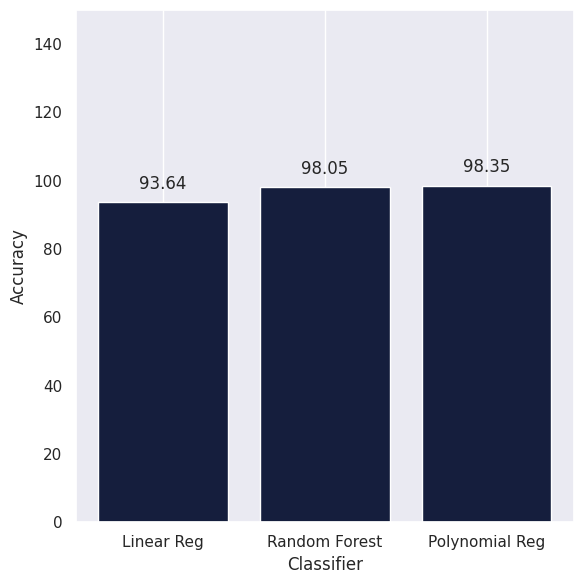

In [28]:
# Define the classifiers and their corresponding accuracy values
classifiers = ['Linear Regression', 'Random Forest Classifier','Polynomial Regression']
accuracies = [0.93, 0.98, 0.98]

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color='#151e3d')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')

# Annotate the data points with accuracy values
for i, acc in enumerate(accuracies):
    plt.annotate(f'{acc:.4f}', (classifiers[i], acc), textcoords="offset points", xytext=(0, 10), ha='center')

# Display the plot
plt.tight_layout()
plt.show()

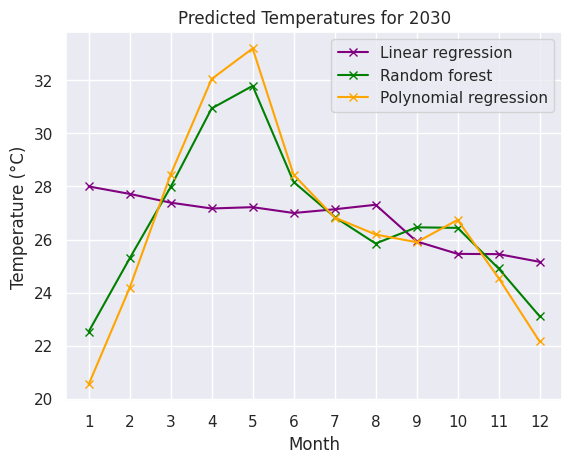

In [29]:
# Plot predicted temperatures as a red line
plt.plot(months, predicted_temperatures_lr, marker='x', color='purple', label='Linear regression')
# Plot predicted temperatures as a red line
plt.plot(months, predicted_temperatures_rf, marker='x', color='green', label='Random forest')
# Plot predicted temperatures as a red line
plt.plot(months, predicted_temperatures_poly, marker='x', color='orange', label='Polynomial regression')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title(f'Predicted Temperatures for {future_year_to_predict}')
plt.xticks(months)  # Set x-axis ticks to represent months
plt.grid(True)
plt.legend()
plt.show()